# Google Play Store Exploratory Data Analysis

**Author Name:** Haider Rasool Qadri

**Email:** haiderqadri.07@gmail.com

**Github:** [github](https://github.com/HaiderQadri)

**Linkedin:** [linkedin](https://www.linkedin.com/in/haider-rasool-qadri-06a4b91b8/)

# About the Data

## Description
The Data Set was downloaded from Kaggle, from the following [link](https://www.kaggle.com/datasets/lava18/google-play-store-apps/)

## Context

 While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

## Content

Each app (row) has values for catergory, rating, size, and more.

## Acknowledgements 

This information is scraped from the Google Play Store. This app information would not be available without it.

## Inspiration

The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

# Purpose of this analysis




# Import the liberaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

# Load the dataset

In [2]:
df = pd.read_csv('./data/googleplaystore.csv')

# Pre-Processing of data 

In [3]:
# Lets take a sample of data 
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5485,AP Math & Computer Science,FAMILY,3.7,37,9.5M,"5,000+",Free,0,Everyone,Education,"July 19, 2015",2.16,2.3 and up
2054,No.Draw - Colors by Number 2018,FAMILY,4.5,235906,13M,"10,000,000+",Free,0,Everyone,Entertainment;Brain Games,"July 29, 2018",1.2.0,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
21,Boys Photo Editor - Six Pack & Men's Suit,ART_AND_DESIGN,4.1,654,12M,"100,000+",Free,0,Everyone,Art & Design,"March 20, 2018",1.1,4.0.3 and up
720,Learn English Words Free,EDUCATION,4.6,172640,14M,"5,000,000+",Free,0,Everyone,Education,"May 2, 2018",2.6.2,4.1 and up


In [4]:
df.shape

(10841, 13)

### Observations:

- There are 10841 rows and 13 columns in the dataset.
---

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


### Observations

- Total rows = 10841.
- Total columns = 13.
- There is 1 float64, 1 int64 and 11 object datatype columns.
- We can see names of the column and its dtype.
- We can see the there are missing values in the dataset. 
- We can see that there are 3 columns that are of object dtype but these must be of numeric dtype.
  1. Size, 2. Installs and 3. Price
---

In [6]:
# Let's check for duplicated rows
df.duplicated().sum()

483

### Observations

- There are 483 duplicated rows in the dataset.
---

In [7]:
# Let's remove the duplicated rows
df.drop_duplicates(inplace = True)

In [8]:
df.shape

(10358, 13)

### Observations

- After removing duplicates we left with 10358 rows.
---

In [9]:
# Now, let's check for missing values
df.isnull().sum().sort_values(ascending = False)

Rating            1465
Current Ver          8
Android Ver          2
Category             1
Type                 1
Genres               1
App                  0
Reviews              0
Size                 0
Installs             0
Price                0
Content Rating       0
Last Updated         0
dtype: int64

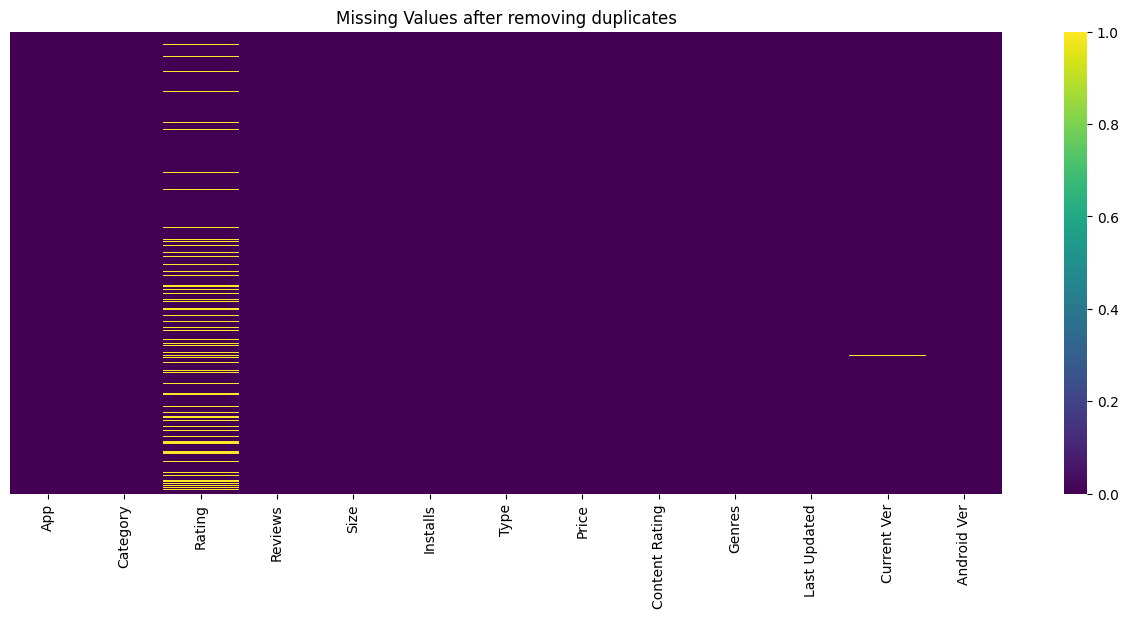

In [10]:
# Let's see missing values in a plot
plt.figure(figsize = (16, 6))
sns.heatmap(df.isnull(), cbar = True, yticklabels = False, cmap='viridis')
plt.title('Missing Values after removing duplicates')
plt.show()

In [11]:
# Let's clean the size column
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

### Observations

- There are may unique values in the size column first we need to convert them into common unit form M and K to bytes and then remove M and K from the values and remove Varies with device and make it numeric column.
---

In [12]:
df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()

8517

In [13]:
df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()

315

In [14]:
df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()

1526

In [15]:
8517+315+1526

10358

In [16]:
df['Size'].value_counts().sum()

10358

### Observations

- 8517 values have M in it.
- 315 values have k in it.
- 1526 values have Varies with device

Let's convert M and k into bytes and remove M, k and Varies with device to convert this column into numeric.

---

In [17]:
# define a function
def convert_size(size):
    if isinstance(size, str):
        if 'M' in size:
            return float(size.replace('M', '')) * 1024 * 1024
        elif 'k' in size:
            return float(size.replace('k', '')) * 1024
        elif 'Varies with device' in size:
            return np.nan
    return

In [18]:
# apply the function on Size Column
df['Size'] = df['Size'].apply(convert_size)

In [19]:
# rename Size column into Size_in_bytes
df.rename(columns = {'Size': 'Size_in_bytes'}, inplace = True)

In [20]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [21]:
# We usually use MB, So let's create a new column named as Size_in_mbs
df['Size_in_mbs'] = df['Size_in_bytes'].apply(lambda x: x/(1024 * 1024))

In [22]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_mbs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8


In [23]:
df['Size_in_mbs'].dtype

dtype('float64')

- Here, we successfully converted Size column from object dtype to numeric dtype.

In [24]:
# Let's have a look at Installs Column
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  int64  
 4   Size_in_bytes   8832 non-null   float64
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10358 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10356 non-null  object 
 13  Size_in_mbs     8832 non-null   float64
dtypes: float64(3), int64(1), object(10)
memory usage: 1.2+ MB


In [25]:
df['Installs'].isnull().sum()

0

In [26]:
df['Installs'].value_counts()

Installs
1,000,000+        1488
10,000,000+       1132
100,000+          1129
10,000+           1033
1,000+             891
100+               710
5,000,000+         683
500,000+           517
50,000+            474
5,000+             469
10+                385
100,000,000+       369
500+               328
50,000,000+        272
50+                204
5+                  82
1+                  67
500,000,000+        61
1,000,000,000+      49
0+                  14
0                    1
Name: count, dtype: int64

In [27]:
df['Installs'].loc[df['Installs'].str.contains('\+')].value_counts().sum()

10357

In [28]:
df['Installs'].value_counts().sum()

10358

### Observations

- Only + sign is creating issue so remove + sign from the values.
- No, missing values.
- One value have no + sign.
- Let's remove the + and , signs from the values and it will be converted into numeric.
---

In [29]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '' ) if ',' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: int(x))

In [30]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_mbs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  int64  
 4   Size_in_bytes   8832 non-null   float64
 5   Installs        10358 non-null  int64  
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10358 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10356 non-null  object 
 13  Size_in_mbs     8832 non-null   float64
dtypes: float64(3), int64(2), object(9)
memory usage: 1.2+ MB


In [32]:
# Let's have a look at Price Column
df['Price'].value_counts()

Price
0          9593
$0.99       146
$2.99       125
$1.99        73
$4.99        70
           ... 
$389.99       1
$19.90        1
$1.75         1
$14.00        1
$1.04         1
Name: count, Length: 92, dtype: int64

In [33]:
df['Price'].loc[df['Price'].str.contains('\$')].value_counts().sum()

765

In [34]:
9593+765

10358

In [35]:
df['Price'].value_counts().sum()

10358

- Here, we can confirm that the only issue is $ sign.

In [36]:
# Let's remove dollar sign from the values and convert it into numerical column
df['Price'] = df['Price'].apply(lambda x: x.replace('$', '') if '$' in str(x) else x)
df['Price'] = df['Price'].apply(lambda x: float(x))

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  int64  
 4   Size_in_bytes   8832 non-null   float64
 5   Installs        10358 non-null  int64  
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  float64
 8   Content Rating  10358 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10356 non-null  object 
 13  Size_in_mbs     8832 non-null   float64
dtypes: float64(4), int64(2), object(8)
memory usage: 1.2+ MB


In [38]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_mbs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8


In [39]:
# Let's remove Size_in_bytes Column from the dataset 
df.drop('Size_in_bytes', axis = 1, inplace = True)

In [40]:
df.head()

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_mbs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  int64  
 4   Installs        10358 non-null  int64  
 5   Type            10357 non-null  object 
 6   Price           10358 non-null  float64
 7   Content Rating  10358 non-null  object 
 8   Genres          10357 non-null  object 
 9   Last Updated    10358 non-null  object 
 10  Current Ver     10350 non-null  object 
 11  Android Ver     10356 non-null  object 
 12  Size_in_mbs     8832 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


Untill now, we converted the three object type columns into numeric.

# Summary of Statistics

In [42]:
df.describe()

,Rating,Reviews,Installs,Price,Size_in_mbs
count,8893.000000,1.035800e+04,1.035800e+04,10358.000000,8832.000000
mean,4.187619,4.058654e+05,1.415639e+07,1.030701,21.285343
std,0.522910,2.696651e+06,8.023580e+07,16.277843,22.540155
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.008301
25%,4.000000,3.200000e+01,1.000000e+03,0.000000,4.700000
50%,4.300000,1.678500e+03,1.000000e+05,0.000000,13.000000
75%,4.500000,4.640425e+04,1.000000e+06,0.000000,29.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000,100.000000


### Observations

- Now, we have only 5 columns as numeric data type.
- We can observe their descriptive statistics. and make tons of observations as per our hypotheses.
- We can see that the Rating column has a minimum value of 1 and a maximum value of 5, which is the range of rating, and the mean is 4.19 which is a good rating. On an average people give this rating.
- Similarly, we can observe the other columns as well.
---

# Imputation of Missing Values

In [43]:
# Let's impute missing values
df.isnull().sum().sort_values(ascending = False)

Size_in_mbs       1526
Rating            1465
Current Ver          8
Android Ver          2
Category             1
Type                 1
Genres               1
App                  0
Reviews              0
Installs             0
Price                0
Content Rating       0
Last Updated         0
dtype: int64

In [44]:
# total  number of mising values 
df.isnull().sum().sum()


3004

In [45]:
# Let's check the percentage of missing values in the data
round((df.isnull().sum() / len(df) * 100).sort_values(ascending = False), 2) 

Size_in_mbs       14.73
Rating            14.14
Current Ver        0.08
Android Ver        0.02
Category           0.01
Type               0.01
Genres             0.01
App                0.00
Reviews            0.00
Installs           0.00
Price              0.00
Content Rating     0.00
Last Updated       0.00
dtype: float64

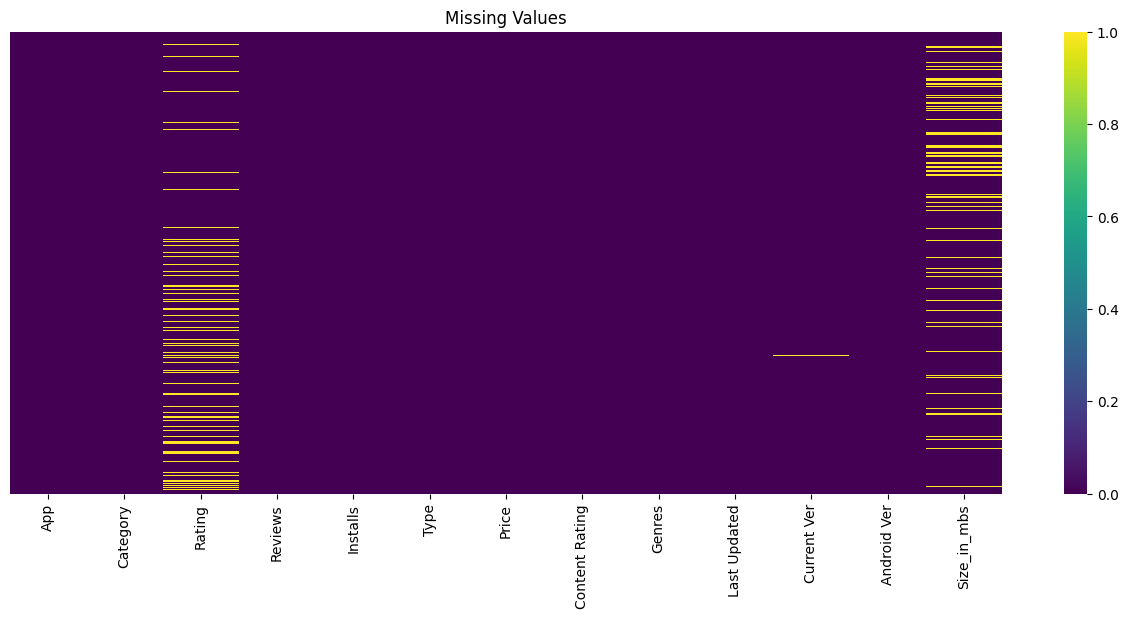

In [46]:
# Let's see the missing values in a plot
# Let's see missing values in a plot
plt.figure(figsize = (16, 6))
sns.heatmap(df.isnull(), cbar = True, yticklabels = False, cmap='viridis')
plt.title('Missing Values')
plt.show()

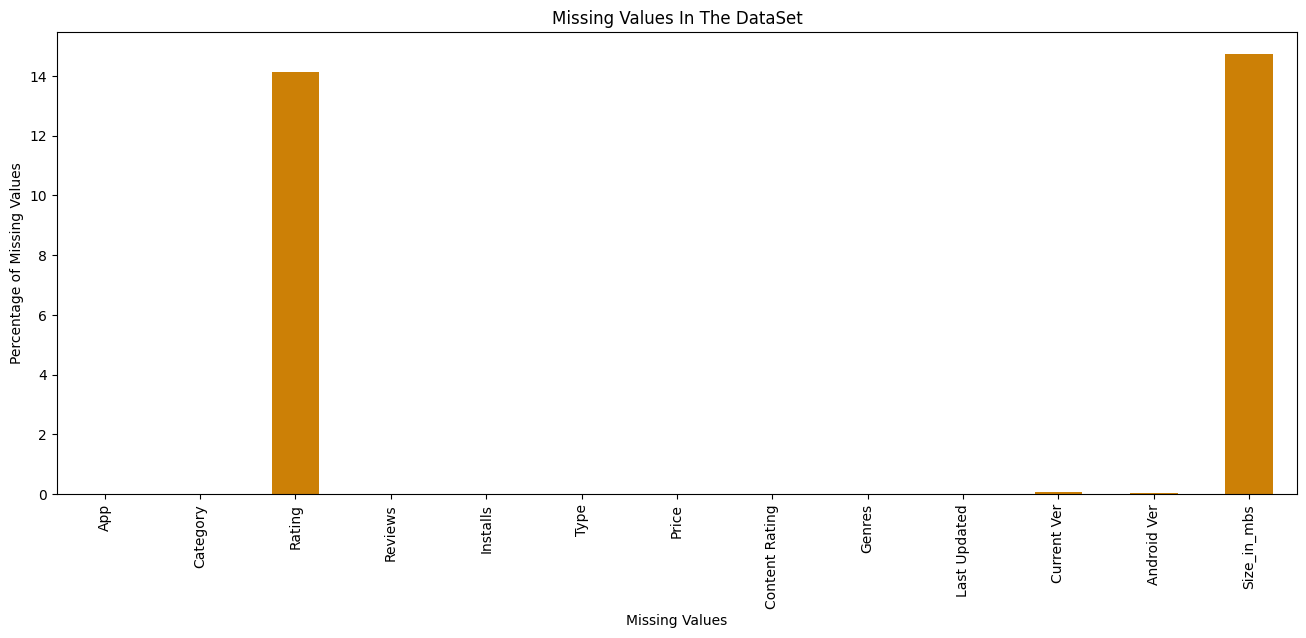

In [47]:
# Let's draw a plot showing percentage of missing values
plt.figure(figsize = (16, 6))
percen_missing_values = round(df.isnull().sum() / len(df) * 100, 2)
percen_missing_values.plot(kind = 'bar', color = '#cc8006')
plt.xlabel('Missing Values')
plt.ylabel('Percentage of Missing Values')
plt.title('Missing Values In The DataSet')
plt.show()

## Plot the missing values that are less than 1 percent

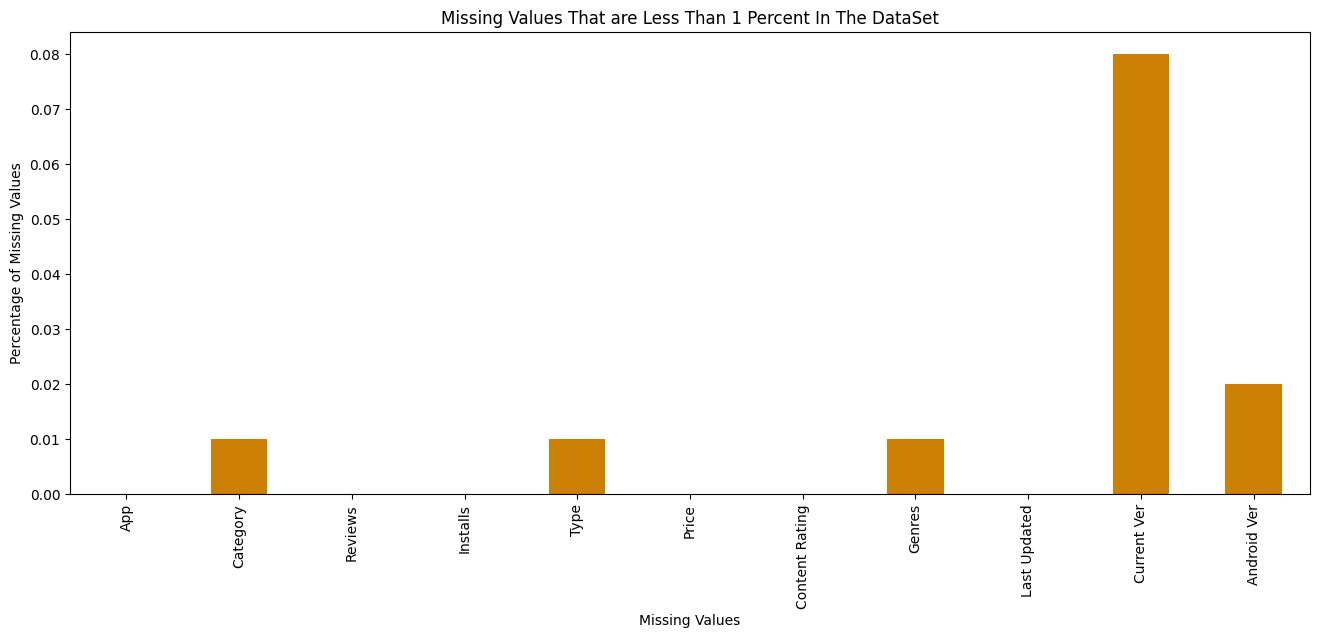

In [48]:
# since we are facing difficulty in visualiaing missing values that are less than 1 percent
plt.figure(figsize = (16, 6))
percen_missing_values[percen_missing_values < 1].plot(kind = 'bar', color = '#cc8006')
plt.xlabel('Missing Values')
plt.ylabel('Percentage of Missing Values')
plt.title('Missing Values That are Less Than 1 Percent In The DataSet')
plt.show()

In [49]:
round(df.isnull().sum().sort_values(ascending = False) / len(df) * 100, 2)

Size_in_mbs       14.73
Rating            14.14
Current Ver        0.08
Android Ver        0.02
Category           0.01
Type               0.01
Genres             0.01
App                0.00
Reviews            0.00
Installs           0.00
Price              0.00
Content Rating     0.00
Last Updated       0.00
dtype: float64

### Observations

- 1526 missing values in Size_in_mbs column, which are 14.73 percent of the data.
- 1465 missing values in Ratting Column, which are 14.14 percent of the data.
- 8 missing values in Current Ver Column, which are 0.08 percent of the data.
- 2 missing values in Andriod Column, which are 0.02 percent of the data.
- 1 missing value in Category Column, which are 0.01 percent of the data.
- 1 missing value in Type Column, which are 0.01 percent of the data.
- 1 missing value in Genres Column, which are 0.01 percent of the data.
---

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  int64  
 4   Installs        10358 non-null  int64  
 5   Type            10357 non-null  object 
 6   Price           10358 non-null  float64
 7   Content Rating  10358 non-null  object 
 8   Genres          10357 non-null  object 
 9   Last Updated    10358 non-null  object 
 10  Current Ver     10350 non-null  object 
 11  Android Ver     10356 non-null  object 
 12  Size_in_mbs     8832 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


In [51]:
# Let's check the correlation between the numerics columns
numeric_columns = ['Rating', 'Reviews', 'Installs', 'Price', 'Size_in_mbs']
df[numeric_columns].corr()

,Rating,Reviews,Installs,Price,Size_in_mbs
Rating,1.000000,0.068738,0.050925,-0.022301,0.082339
Reviews,0.068738,1.000000,0.634998,-0.009416,0.237896
Installs,0.050925,0.634998,1.000000,-0.011146,0.168880
Price,-0.022301,-0.009416,-0.011146,1.000000,-0.023762
Size_in_mbs,0.082339,0.237896,0.168880,-0.023762,1.000000


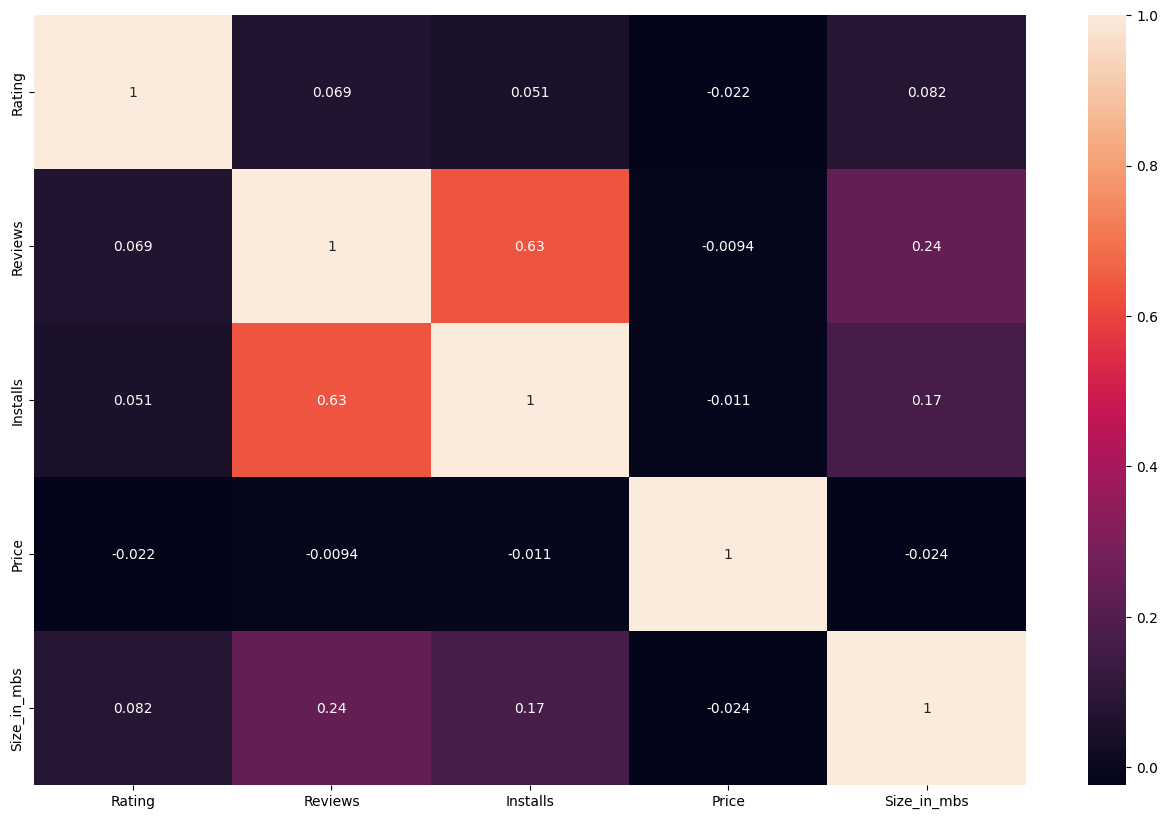

In [52]:
# Let's plot the correlation matrix
plt.figure(figsize = (16, 10))
sns.heatmap(df[numeric_columns].corr(), annot = True)
plt.show()

### Observations

- Lighter color shows the high correlation and darker color shows the low correlation.
- We can see that the Reviews column has a high correlation with the Installs column, which is 0.63 according to correlation, which is quite good.
- This shows that the more the reviews the more the installs are for one app. If in any case we need to impute reviews we have to think of number of install.
---

In [54]:
df.isnull().sum().sort_values(ascending = False)

Size_in_mbs       1526
Rating            1465
Current Ver          8
Android Ver          2
Category             1
Type                 1
Genres               1
App                  0
Reviews              0
Installs             0
Price                0
Content Rating       0
Last Updated         0
dtype: int64

### Observations

- Let's remove the null values in 'Current Ver', 'Androidd', 'Category', 'Type' and 'Genres' columns missing values because these missing values are very less in numbers and did not affect our analysis.
---

In [57]:
df.dropna(subset = ['Current Ver', 'Android Ver', 'Category', 'Type', 'Genres'], inplace = True)

- Now, Only two columns are left with null values. Let's immpute them.

In [59]:
df.isnull().sum().sort_values(ascending = False)

Size_in_mbs       1525
Rating            1460
App                  0
Category             0
Reviews              0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

### Observations

- Only Rating and Size_in_Mb columns are left with missing values.
- We know that we have to be carefull while deadling with Rating column, as it is directly linked with the Installs column.
- In Size columns we already know about Varies with device values, which we have converted into null values, we do not need to impute at the moment, as every app has different size and nobody can predict that as nearly as possible. 
---

In [61]:
df.head()

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_mbs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8


In [62]:
# Let's make a new column called 'Installs_category' which will have the category of the installs
bins = [-1, 0, 10, 1000, 10000, 100000, 1000000, 10000000, 10000000000]
labels=['no', 'Very low', 'Low', 'Moderate', 'More than moderate', 'High', 'Very High', 'Top Notch']
df['Installs_category'] = pd.cut(df['Installs'], bins=bins, labels=labels)

In [66]:
df['Installs_category'].value_counts()

Installs_category
Low                   2129
High                  2003
Very High             1815
More than moderate    1602
Moderate              1499
Top Notch              751
Very low               533
no                      14
Name: count, dtype: int64

In [69]:
# use groupby function to find the trend of Rating in each Installs_category
df.groupby('Installs_category')['Rating'].describe().T

Installs_category,no,Very low,Low,Moderate,More than moderate,High,Very High,Top Notch
count,0.0,81.000000,1255.00000,1413.000000,1571.000000,2000.000000,1815.000000,751.000000
mean,NaN,4.637037,4.17004,4.031352,4.094653,4.207100,4.285675,4.372170
std,NaN,0.845199,0.82942,0.605581,0.504221,0.378591,0.301071,0.195374
min,NaN,1.000000,1.00000,1.400000,1.600000,1.800000,2.000000,3.100000
25%,NaN,4.800000,3.80000,3.800000,3.900000,4.000000,4.100000,4.300000
50%,NaN,5.000000,4.40000,4.200000,4.200000,4.300000,4.300000,4.400000
75%,NaN,5.000000,4.80000,4.500000,4.500000,4.500000,4.500000,4.500000
max,NaN,5.000000,5.00000,5.000000,4.900000,4.900000,4.900000,4.800000


In [70]:
df['Rating'].isnull().sum()

1460

In [72]:
# In, which Install_category Ratting has null values
df['Installs_category'].loc[df['Rating'].isnull()].value_counts()

Installs_category
Low                   874
Very low              452
Moderate               86
More than moderate     31
no                     14
High                    3
Very High               0
Top Notch               0
Name: count, dtype: int64

Text(7, 3.5, 'Null values: 0')

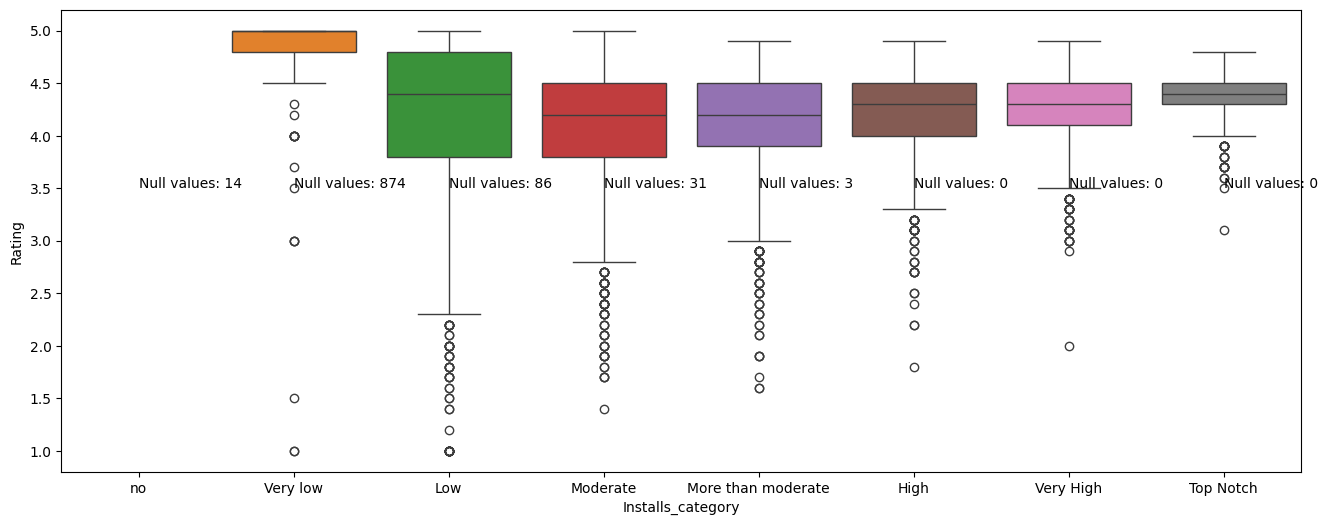

In [73]:
# plot the boxplot of Rating in each Installs_category
plt.figure(figsize=(16, 6)) 
sns.boxplot(x='Installs_category', y='Rating', hue='Installs_category', data=df) 
# add the text of number of null values in each category
plt.text(0, 3.5, 'Null values: 14')
plt.text(1, 3.5, 'Null values: 874')
plt.text(2, 3.5, 'Null values: 86')
plt.text(3, 3.5, 'Null values: 31')
plt.text(4, 3.5, 'Null values: 3')
plt.text(5, 3.5, 'Null values: 0')
plt.text(6, 3.5, 'Null values: 0')
plt.text(7, 3.5, 'Null values: 0')

- Let's check if there is any similar link with Reviews as well

In [74]:
df['Installs_category'].loc[df['Reviews'].isnull()].value_counts()

Installs_category
no                    0
Very low              0
Low                   0
Moderate              0
More than moderate    0
High                  0
Very High             0
Top Notch             0
Name: count, dtype: int64

### Observations

- No null values in the Review Column
---

<Axes: xlabel='Installs_category', ylabel='Reviews'>

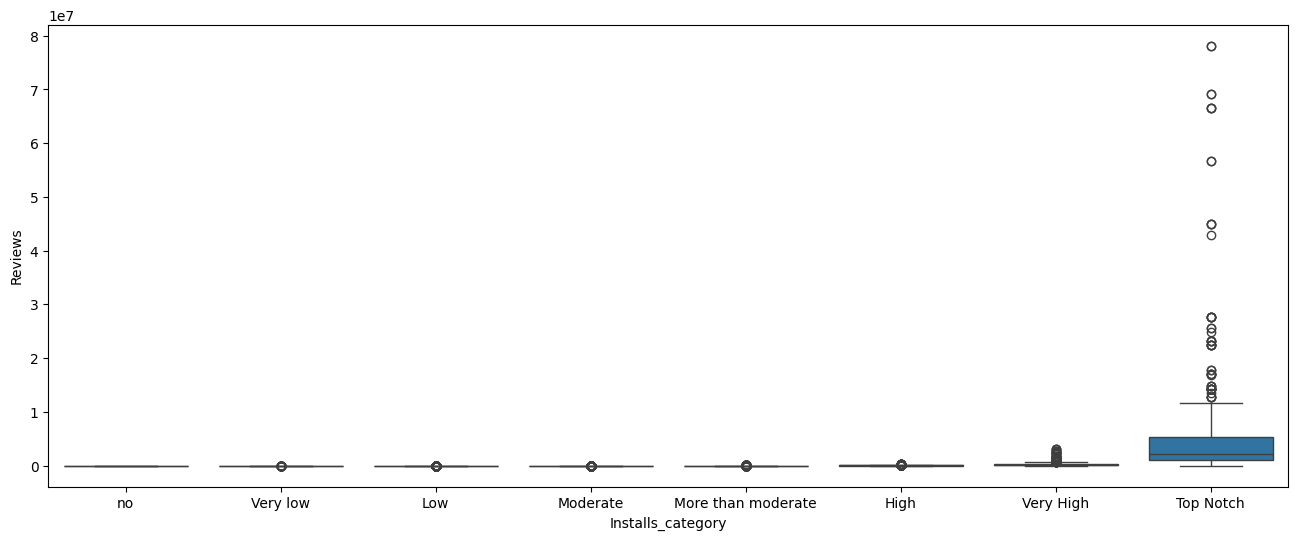

In [76]:
# let's plot the same plots for Reviews column as well
plt.figure(figsize=(16, 6)) 
sns.boxplot(x='Installs_category', y= 'Reviews', data=df)

- The data looks really imbalance, let's normalize the data using log transformation

<Axes: xlabel='Installs_category', ylabel='Reviews'>

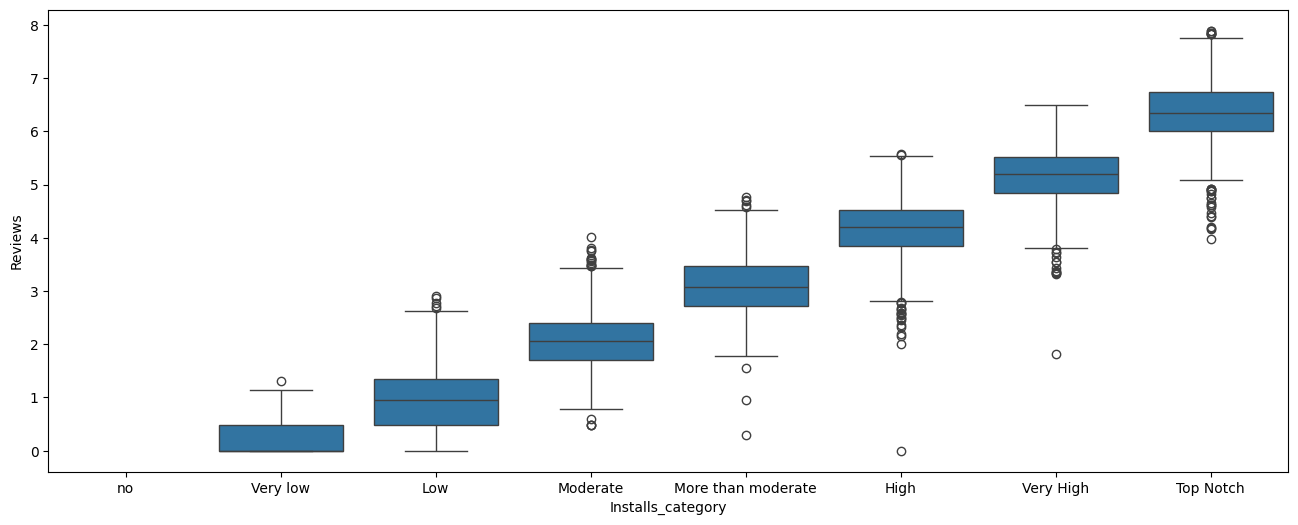

In [77]:
# let's plot the same plots for Reviews column as well
plt.figure(figsize=(16, 6)) 
sns.boxplot(x='Installs_category', y= np.log10(df['Reviews']), data=df) 

<Axes: xlabel='Rating', ylabel='Reviews'>

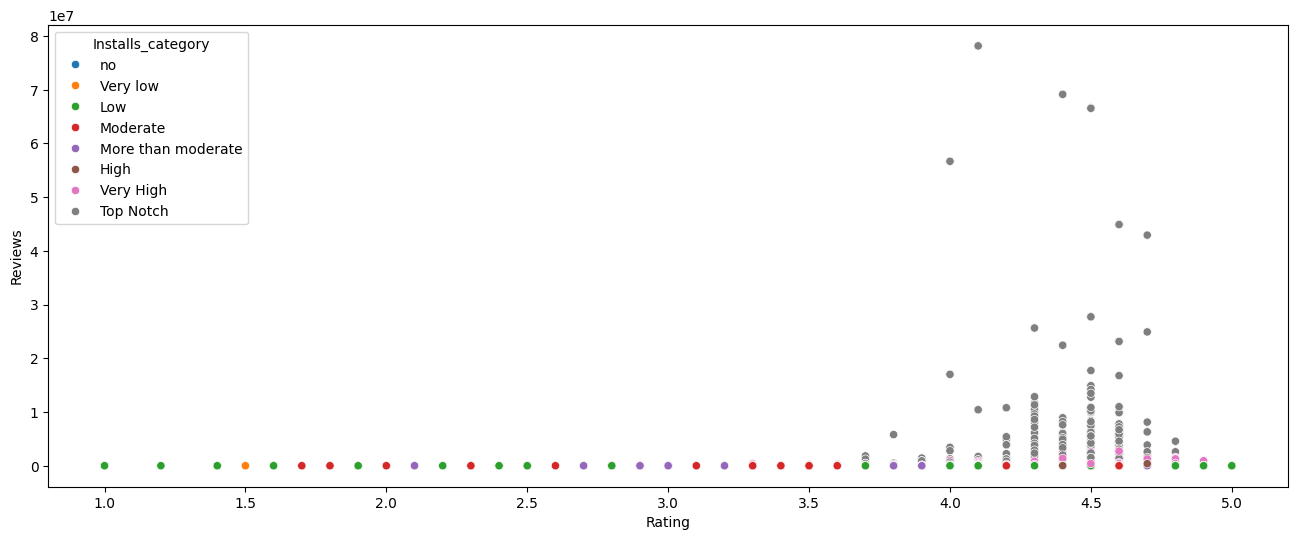

In [78]:
# Draw a scatter plot between Rating, Reviews and Installs
plt.figure(figsize=(16, 6)) 

sns.scatterplot(x='Rating', y='Reviews', hue='Installs_category', data=df) 

### Observations

- It doesn't show any trend, because, you should know that Rating is a categorical variable and Reviews is a continuous variable, therefore, we can not plot them together.
- Let's try with Reviews and Installs
---

<Axes: xlabel='Reviews', ylabel='Installs'>

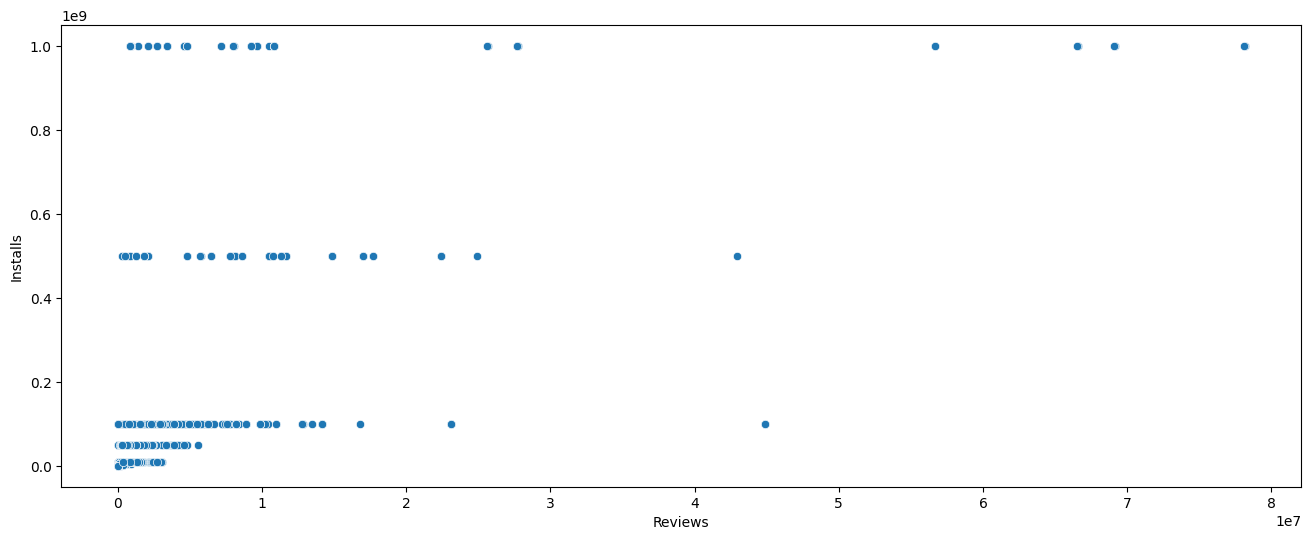

In [79]:
# plot reviews and installs in a scatter plot
plt.figure(figsize=(16, 6))
sns.scatterplot(x='Reviews', y='Installs', data=df) 

- We did not see any trend and the issue is we need to normalize the data before plotting it, let's try with log transformation

<Axes: xlabel='Reviews', ylabel='Installs'>

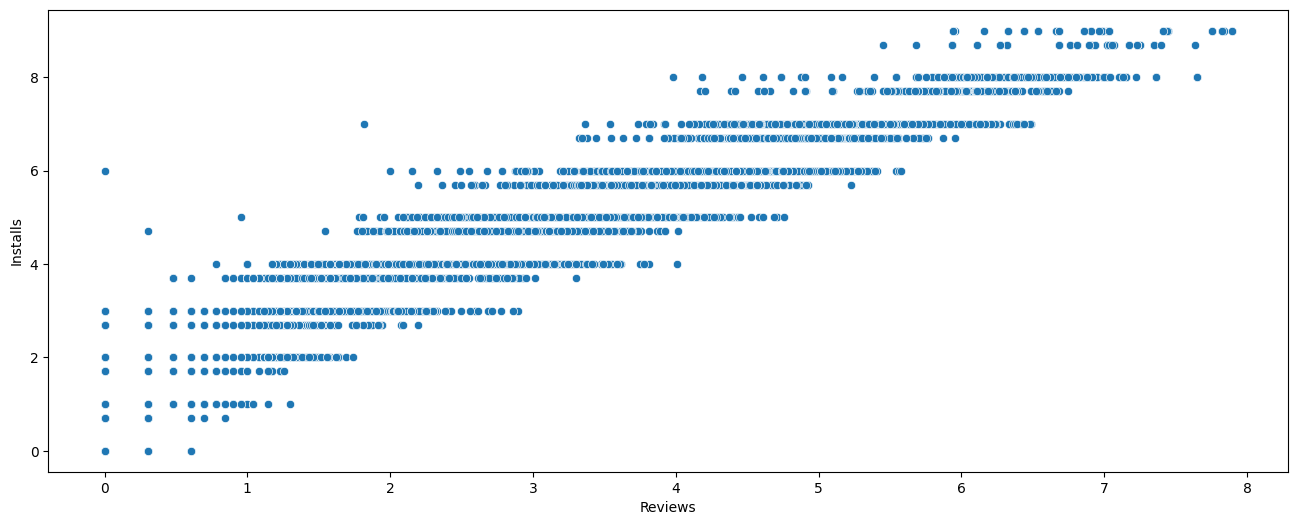

In [80]:
# plot reviews and installs in a scatter plot
plt.figure(figsize=(16, 6)) 
sns.scatterplot(x=np.log10(df['Reviews']), y=np.log10(df['Installs']), data=df)

- Now we see a slight trend but still the issue is installs were given in a factorial manner, as 10+, 20+, 1000+ etc, and these are not continuous number but Discreet one, therefore, we can only see a slight trends here. Let's plot a line plot to see the trend.

<Figure size 1600x600 with 0 Axes>

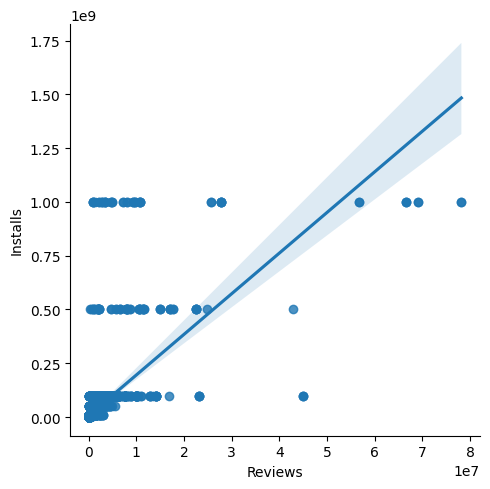

In [81]:
# plot reviews and installs in a scatter plot with trend line
plt.figure(figsize=(16, 6)) 
sns.lmplot(x='Reviews', y='Installs', data=df) 

- Here, we can see a nice trend, which shows that number of Reviews increases with the number of Installs, which is quite obvious.

### Observations

- We can see that most of the null values from Rating column are no - Moderate Installation apps, which make sense that if the app has less installations, it has less Rating and review.
---